# A deep learning approach to observe the behaviour of employees towards punctuality at work

In this project we will implement three different classification algorithms from scratch. i.e. we implement all the mathematics invovled in these algorithms.  
    - Logistic Regression
    - Neural Network (One hidden layer)
    - Deep Learning Neural Network (At least two hidden layers)
   
At the end of the project, we compare the performance of three different models and will use different optimization techniques to further improve the performance. 

We will also implement the Deep Learning Neural Network in Tensorflow, as Tensorflow is one of the most widely used deep learning framework. 

We will also use these models implemented in library sklearn and compare the performance of our implementation from scratch to these buildin functions. 

After the implementation of algorithms along with different optimization techniques, we will further analyze our data and will understand different features and see what are the most important features that is effecting employees to have excessive number of hours absent from work and how we can build a model to reduce its impact. 


## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [data_utils] has different functions to load data, analyze data and different other visualization functions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import sklearn
import sklearn.linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from data_utils import *

## 2 - Analysis of Dataset ##

Let's get more familiar with the dataset. 

We will load 60% data to train, 20% data to dev/validation and 20% data to test. In the implementation dev and validation are used interchangeably and both mean the same set. We also bring the matrix into the order to be processed by our algorithm. For example in the original data, we have all features in different columns and the last column is the result. In the rearrangement we bring all the features to a single column, so that we have all the features of the first training example in the first column, all the features of the second training example in the seond column and so on. The result is stored in a horizantal vector, where each column represent the result of the training samples.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that we substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. Let's standardize our dataset.

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, n_features, ...)
- Reshape the datasets such that each example is now a vector of size (n_features, 1)
- We place all vectora of examples and stack them vertical into a single matrix
- "Standardize" the data
</font>

In [2]:
file = 'dataset/Absenteeism_at_work.csv'

# Load the dataset as DataFrame in Pandas and then convert to matrix
#data = load_dataset(file)
df = pd.read_csv(file)
print('Shape of dataset is:{}'.format(df.shape))
print('Type of features is:\n{}'.format(df.dtypes))

Shape of dataset is:(740, 22)
Type of features is:
ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
Absenteeism category                 int64
dty

our data is not balanced. To bring it into balanced, we should use SMOTE


In [3]:
col = 'Absenteeism category'
data = sample_data(df, col)


Shape of X: (740, 21)
Shape of y: (740, 1)
Before OverSampling, counts of label '1': [272]
Before OverSampling, counts of label '0': [468] 

After OverSampling, the shape of X: (936, 21)
After OverSampling, the shape of y: (936, 1) 

After OverSampling, counts of label '1': [468]
After OverSampling, counts of label '0': [468]
Size of the whole data after over sampling (936, 22)


In [4]:
# Randomly distribute data into training, testing and validation classes. We use 60-20-20 distribution
un_training_x, training_y, un_testing_x, testing_y, un_validation_x, validation_y = split_random(data, percent_train=60, percent_test=20)

# Lets normalize our X data
training_x, testing_x, validation_x = normalize_data(un_training_x, un_testing_x, un_validation_x)

# We can print the X data, to be sure that we have the normalized data in the range of -1 to 1
print("X:")
print_normalized_data(training_x, testing_x, validation_x)
print("__________________________________")


# Lets print the Y class, to be sure that we have a mix of positive and negative class
print("Y")
print_normalized_data(training_y, testing_y, validation_y)
print("__________________________________")

percent_train 60
percent_test 20
percent_validation 20
Number of training examples: m_train = 561
Number of testing examples: m_test = 187
Number of validation examples: m_validation = 188
Number of features: n_features = 21
training_x shape (21, 561)
training_y shape (1, 561)
testing_x shape (21, 187)
testing_y shape (1, 187)
validation_x shape (21, 188)
validation_y shape (1, 188)
Original Data:
[[20.         11.          7.         ... 23.          8.
   1.        ]
 [14.         23.          5.         ... 25.          2.
   0.        ]
 [16.13798242 13.          4.         ... 24.53918262  8.
   1.        ]
 ...
 [ 7.         14.          3.         ... 24.          8.
   1.        ]
 [ 3.         13.          2.         ... 31.          8.
   1.        ]
 [33.         28.         11.         ... 32.          1.
   0.        ]]
____________________________________________________________
X:
Training:

[[0.0020429  0.00143003 0.00164842 ... 0.00286006 0.00224719 0.00367723]
 [0.001

## 3 - Logistic Regression ##


In this part of the project we implement logistic regression algorithm to predict the two categories in our dataset. At the end of this implementation we compare the performance of our detailed implementation to the performance of libray functions of logistic regression. This will serve as a base line to compare our performance with NN and DL and also see how different optimization techniques further improves the performance. 

It's time to design a simple algorithm to distinguish between the two classes in the dataset.

We first build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In Logistic Regression, we carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude
    
### 3.1 - Building the parts of our algorithm ###

The main steps for building a a Logistic Regression in the mindset of Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)
    
The whole model can be explained in the diagram given below. 
<img src="images/image1.png" style="width:650px;height:400px;">

We normally build 1-3 separately and integrate them into one function we call `model()`.

#### 3.1.1 - Helper functions

Implement `sigmoid()`. As we've seen in the figure above, we need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

#### 3.1.2 - Initializing parameters

Implement parameter initialization for Logistic Regression. We have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation. As an optimization step, we can use Xavier initializer, or He initializer to improve the learning process. 

#### 3.1.3 - Forward and Backward propagation

Now that our parameters are initialized, we can do the "forward" and "backward" propagation steps for learning the parameters.

**Task:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using in back propagation: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

### 3.2 Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

### 3.3 Predict labels
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of $A$ into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

    
The prediction process can be explained in the diagram given below. 
<img src="images/image2.png" style="width:650px;height:400px;">

<font color='blue'>
**What to remember:**
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples
</font>

### 3.4 - Merge all functions into a model

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Task:** Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()


In [5]:
def lr_model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = np.zeros((X_train.shape[0],1)),0

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = lr_GradientDescent(w,b,X_train,Y_train,num_iterations,learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_train = lr_predict(w,b,X_train)
    Y_prediction_test = lr_predict(w,b,X_test)

    # Print train/test Errors
    print("train accuracy: ", compute_accuracy(Y_prediction_train, Y_train))
    print("test accuracy: ", compute_accuracy(Y_prediction_test, Y_test))
    
    d = {"costs": costs,
         "Y_prediction_train" : Y_prediction_train, 
         "Y_prediction_test" : Y_prediction_test, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [6]:
d = lr_model(training_x, training_y, testing_x, testing_y, num_iterations = 5000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.691199
Cost after iteration 2000: 0.691173
Cost after iteration 3000: 0.691159
Cost after iteration 4000: 0.691145
train accuracy:  53.11942959001782
test accuracy:  46.524064171122994


**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

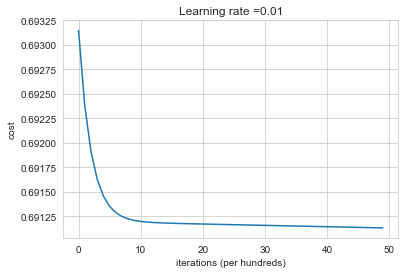

In [7]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

### 3.5 - Further analysis of learning rate

We built our first classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$. In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens. 

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques (e.g. regularization) to reduce overfitting. 

Once, we know an optimized learning rate, we can traing our model again on the selected learning rate and recompute our test/dev set accuracy.

learning rate is: 8.0
train accuracy:  57.04099821746881
test accuracy:  50.26737967914438

-------------------------------------------------------

learning rate is: 2
train accuracy:  57.04099821746881
test accuracy:  50.26737967914438

-------------------------------------------------------

learning rate is: 1
train accuracy:  57.04099821746881
test accuracy:  50.26737967914438

-------------------------------------------------------

learning rate is: 0.1
train accuracy:  53.11942959001782
test accuracy:  46.524064171122994

-------------------------------------------------------

learning rate is: 0.01
train accuracy:  53.11942959001782
test accuracy:  46.524064171122994

-------------------------------------------------------

learning rate is: 0.001
train accuracy:  53.11942959001782
test accuracy:  46.524064171122994

-------------------------------------------------------



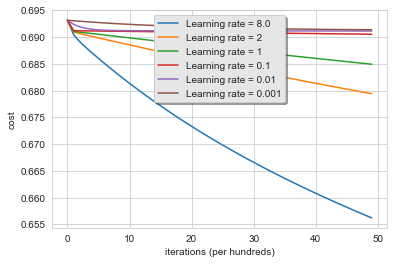

In [8]:
learning_rates = [8.0, 2, 1, 0.1, 0.01, 0.001] # Over shoot after 8.0
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = lr_model(training_x, training_y, testing_x, testing_y, num_iterations = 5000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

show_multiple_learning_rate(models, learning_rates, 'lr_multiple_alpha')

train accuracy:  57.04099821746881
test accuracy:  51.8716577540107
train accuracy:  79.7872340425532
test accuracy:  70.58823529411765


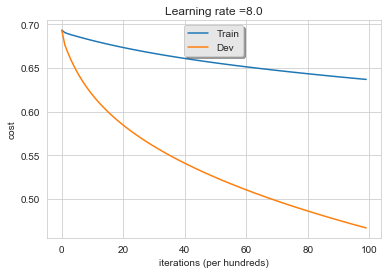

In [38]:
lrate = 8.0
d1 = lr_model(training_x, training_y, testing_x, testing_y, num_iterations = 10000, learning_rate = lrate, print_cost = False)
d2 = lr_model(validation_x, validation_y, testing_x, testing_y, num_iterations = 10000, learning_rate = lrate, print_cost = False)


show_train_dev_learning_rate(d1['costs'], d2['costs'], lrate, 'lr_alpha')

Train accuracy:  53.11942959001782
Dev accuracy:  44.14893617021277
Test accuracy:  46.524064171122994
Confusion matrix of Testing Data:
[[  0 100]
 [  0  87]]


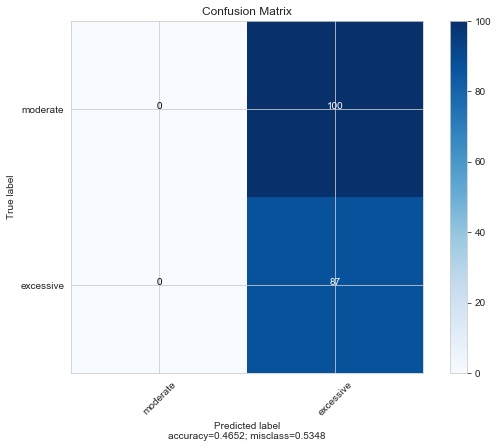

Classification Report:
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       100
        1.0       0.47      1.00      0.64        87

avg / total       0.22      0.47      0.30       187

Precision score: 0.21644885469987704
Recall score: 0.46524064171123
F1 Score: 0.2954447870720949
Logistic Regression


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


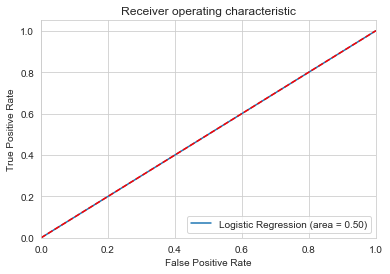

In [10]:
acc_dic = {}
acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "lr_scratch", d, None, acc_dic)

### 3.6 - Compare the performance of our implementation with $sklearn$ library code

We would like to compare our performance with the library code that is already implemented in sklearn. 

In [11]:
clf = sklearn.linear_model.LogisticRegressionCV();
print(clf.fit(training_x.T, training_y.T.reshape(training_x.shape[1],)))

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)


The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

hi
Train accuracy:  96.07843137254902
Dev accuracy:  86.70212765957447
Test accuracy:  91.44385026737967
Confusion matrix of Testing Data:
[[84 16]
 [ 0 87]]


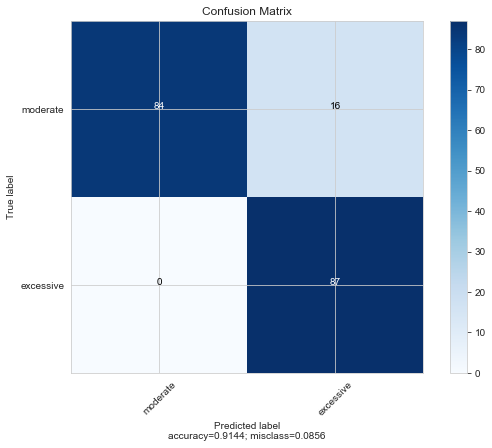

Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      0.84      0.91       100
        1.0       0.84      1.00      0.92        87

avg / total       0.93      0.91      0.91       187

Precision score: 0.9277296090545663
Recall score: 0.9144385026737968
F1 Score: 0.9143210269337609
lr_sklearn


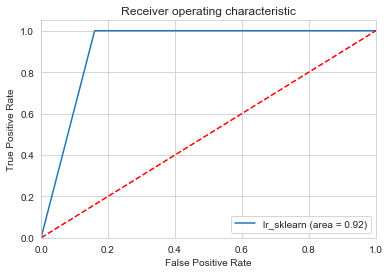

In [12]:
acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "lr_sklearn", None, clf, acc_dic)

## 4 - Classification of data with one hidden layer Neural Network ##

It's time to build your first neural network, which will have a hidden layer. You will see a big difference between this model and the one you implemented using logistic regression. 

**You will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation

You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

### 4.1 - Defining the neural network structure ####

Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (set this to 4) 
    - n_y: the size of the output layer
    
### 4.2 - Initialize the model's parameters ####

Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values. For Neural Network we always initialize randomly, otherwise if we initialize from 0 we will have symmetry in computation. We can also use Xavier or He initializer.
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.
    
### 4.3 - Forward Propagation ####

**Task**: Implement `forward_propagation()`.

**Instructions**:
- Look above at the mathematical representation of your classifier.
- You can use the function `sigmoid()`. 
- You can use the function `np.tanh()`. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

### 4.4 - The cost function

Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(you can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).


### 4.5 - Backward Propagation

Using the cache computed during forward propagation, you can now implement backward propagation.

**Task**: Implement the function `backward_propagation()`.

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here is the mathemaical formulea on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  

<img src="images/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

### 4.6 - Update parameters through Gradient Descent

Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

**Illustration**: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">

### 4.7 - Integrate parts 4.1 - 4.6 in nn_model() ####

Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

### 4.8 Predictions

Use your model to predict by building predict().
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [13]:
def layer_sizes_nn(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

def nn_model(X, Y, n_h, num_iterations = 10000, learning_rate = 1, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed()
    n_x = layer_sizes_nn(X, Y)[0]
    n_y = layer_sizes_nn(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters_nn(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    costs = []
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation_nn(X,parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost_nn(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation_nn(parameters, cache, X, Y)

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate, costs)
        
        # Print the cost every 100 training examples
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return parameters



It is time to run the model and see how it performs on our dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.

In [14]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(training_x, training_y, n_h = 5, num_iterations = 5000, learning_rate = 0.01, print_cost=True)

print("Train accuracy: ", compute_accuracy(nn_predict(parameters,training_x), training_y))
print("Dev accuracy: ", compute_accuracy(nn_predict(parameters,validation_x), validation_y))
print("Test accuracy: ", compute_accuracy(nn_predict(parameters,testing_x), testing_y))

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.691213
Cost after iteration 2000: 0.691200
Cost after iteration 3000: 0.691200
Cost after iteration 4000: 0.691200
Train accuracy:  53.11942959001782
Dev accuracy:  44.14893617021277
Test accuracy:  46.524064171122994


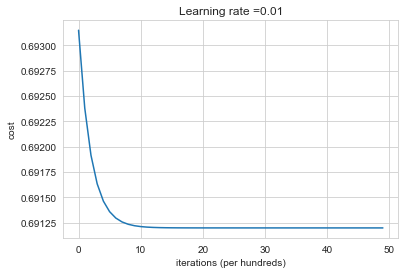

In [15]:
# Plot learning curve (with costs)
costs = np.squeeze(parameters['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(parameters["learning_rate"]))
plt.show()

learning rate is: 0.1
Train accuracy:  53.11942959001782
Dev accuracy:  44.14893617021277
Test accuracy:  46.524064171122994
learning rate is: 0.01
Train accuracy:  53.11942959001782
Dev accuracy:  44.14893617021277
Test accuracy:  46.524064171122994
learning rate is: 0.001
Train accuracy:  53.11942959001782
Dev accuracy:  44.14893617021277
Test accuracy:  46.524064171122994

-------------------------------------------------------



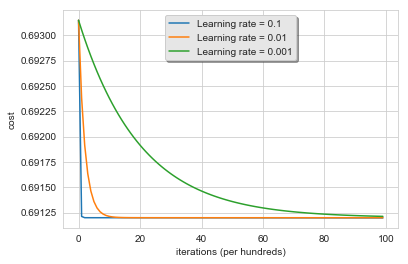

In [16]:
learning_rates = [0.1, 0.01, 0.001] #Above 1 is over shooting for 10000 iterations, even 0.1 is over shooting for 100000
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = nn_model(training_x, training_y, n_h = 5, num_iterations = 10000, learning_rate = i, print_cost=False)
    
    print("Train accuracy: ", compute_accuracy(nn_predict(models[str(i)],training_x), training_y))
    print("Dev accuracy: ", compute_accuracy(nn_predict(models[str(i)],validation_x), validation_y))
    print("Test accuracy: ", compute_accuracy(nn_predict(models[str(i)],testing_x), testing_y))

print ('\n' + "-------------------------------------------------------" + '\n')


show_multiple_learning_rate(models, learning_rates, 'l1_multiple_alpha')

Cost after iteration 0: 0.693148
Cost after iteration 1000: 0.691200
Cost after iteration 2000: 0.691200
Cost after iteration 3000: 0.691200
Cost after iteration 4000: 0.691200
Cost after iteration 5000: 0.691200
Cost after iteration 6000: 0.691199
Cost after iteration 7000: 0.691199
Cost after iteration 8000: 0.691199
Cost after iteration 9000: 0.691199
Train accuracy:  53.11942959001782
Dev accuracy:  44.14893617021277
Test accuracy:  46.524064171122994
Cost after iteration 0: 0.693148
Cost after iteration 1000: 0.686284
Cost after iteration 2000: 0.686282
Cost after iteration 3000: 0.686279
Cost after iteration 4000: 0.686273
Cost after iteration 5000: 0.686260
Cost after iteration 6000: 0.686234
Cost after iteration 7000: 0.686179
Cost after iteration 8000: 0.686065
Cost after iteration 9000: 0.685829


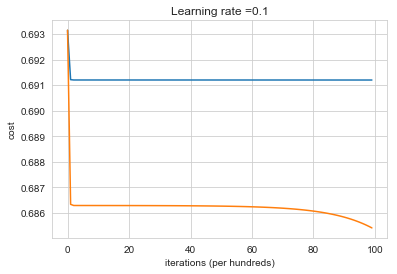

In [17]:
# Rebuild the model with the best possible learning rate
lrate = 0.1
parameters = nn_model(training_x, training_y, n_h = 5, num_iterations = 10000, learning_rate = lrate, print_cost=True)
print("Train accuracy: ", compute_accuracy(nn_predict(parameters,training_x), training_y))
print("Dev accuracy: ", compute_accuracy(nn_predict(parameters,validation_x), validation_y))
print("Test accuracy: ", compute_accuracy(nn_predict(parameters,testing_x), testing_y))

d2 = nn_model(validation_x, validation_y, n_h = 5, num_iterations = 10000, learning_rate = lrate, print_cost=True)

show_train_dev_learning_rate(parameters['costs'], d2['costs'], lrate, 'l1_alpha')

Train accuracy:  53.11942959001782
Dev accuracy:  44.14893617021277
Test accuracy:  46.524064171122994
Confusion matrix of Testing Data:
[[  0 100]
 [  0  87]]


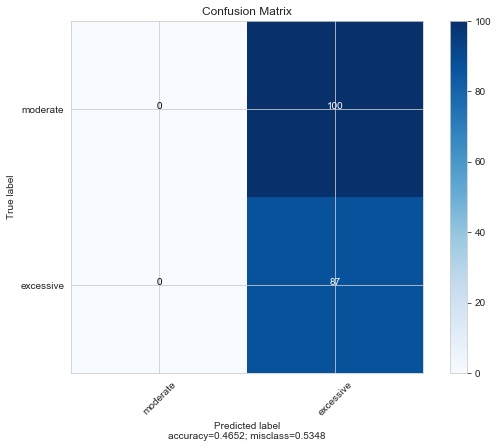

Classification Report:
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       100
        1.0       0.47      1.00      0.64        87

avg / total       0.22      0.47      0.30       187

Precision score: 0.21644885469987704
Recall score: 0.46524064171123
F1 Score: 0.2954447870720949
l1_scratch


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


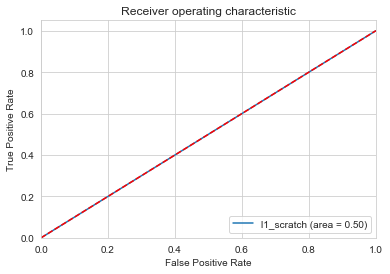

In [18]:
acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "l1_scratch", parameters, None, acc_dic)

### 4.9 - Tuning hidden layer size 

Run the following code. It may take 1-2 minutes. You will observe different behaviors of the model for various hidden layer sizes.

In [19]:
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    parameters = nn_model(training_x, training_y, n_h, num_iterations = 5000)
    predictions = nn_predict(parameters, training_x)
    accuracy = float((np.dot(training_y,predictions.T) + np.dot(1-training_y,1-predictions.T))/float(training_y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Accuracy for 1 hidden units: 53.11942959001783 %
Accuracy for 2 hidden units: 53.11942959001783 %
Accuracy for 3 hidden units: 57.04099821746881 %
Accuracy for 4 hidden units: 56.50623885918004 %
Accuracy for 5 hidden units: 48.663101604278076 %
Accuracy for 20 hidden units: 57.04099821746881 %
Accuracy for 50 hidden units: 57.04099821746881 %


**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to  fits the data well without also incurring noticable overfitting.
- You will also learn later about regularization, which lets you use very large models (such as n_h = 50) without much overfitting. 

<font color='blue'>
**You've learnt to:**
- Build a complete neural network with a hidden layer
- Make a good use of a non-linear unit
- Implemented forward propagation and backpropagation, and trained a neural network
- See the impact of varying the hidden layer size, including overfitting.

### 4.10 - Compare the performance of our implementation with $sklearn$ library code

We would like to compare our performance with the library code that is already implemented in sklearn.

In [20]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=42,max_iter=10)
n_features = training_x.T.shape[0]
print(clf.fit(training_x.T, training_y.T.reshape(n_features,)))

pred = clf.predict(testing_x.T)
print([pred])

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=10, n_iter=None, n_jobs=1, penalty=None, random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False)
[array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 

hi
Train accuracy:  83.77896613190731
Dev accuracy:  72.34042553191489
Test accuracy:  80.21390374331551
Confusion matrix of Testing Data:
[[63 37]
 [ 0 87]]


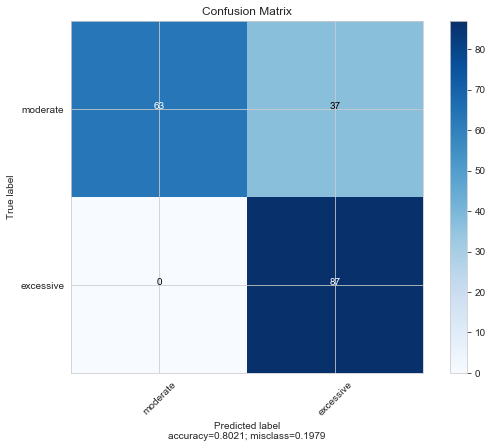

Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      0.63      0.77       100
        1.0       0.70      1.00      0.82        87

avg / total       0.86      0.80      0.80       187

Precision score: 0.8611781956184235
Recall score: 0.8021390374331551
F1 Score: 0.7970304242049007
nn_sklearn


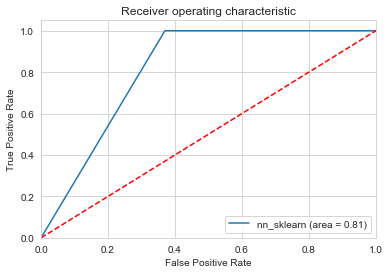

In [21]:
acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "nn_sklearn", None, clf, acc_dic)

## 5 - A Deep Neural Network Model ##


We have previously trained a 2-layer Neural Network (with one single hidden layer). This week, you will build a deep neural network, with as many layers as you want!

- In this task, you will implement all the functions required to build a deep neural network.
- Then we will use these functions to build a deep neural network for the classification of our dataset.

**After this task you will be able to:**
- Use non-linear units like ReLU to improve your model
- Build a deeper neural network (with more than 1 hidden layer)
- Implement an easy-to-use neural network class

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer. 
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).

Let's get started!

To build your neural network, you will be implementing several "helper functions". These helper functions will be used later to build a two-layer neural network and an L-layer neural network. Each small helper function you will implement will have detailed instructions that will walk you through the necessary steps. Here is an outline of this assignment, you will:

- Initialize the parameters for a two-layer network and for an $L$-layer neural network.
- Implement the forward propagation module (shown in purple in the figure below).
     - Complete the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
     - We give you the ACTIVATION function (relu/sigmoid).
     - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
     - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new L_model_forward function.
- Compute the loss.
- Implement the backward propagation module (denoted in red in the figure below).
    - Complete the LINEAR part of a layer's backward propagation step.
    - We give you the gradient of the ACTIVATE function (relu_backward/sigmoid_backward) 
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function.
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function
- Finally update the parameters.

<img src="images/final_outline.png" style="width:800px;height:500px;">
<caption><center> **Figure 1**</center></caption><br>


**Note** that for every forward function, there is a corresponding backward function. That is why at every step of your forward module you will be storing some values in a cache. The cached values are useful for computing gradients. In the backpropagation module you will then use the cache to calculate the gradients. This assignment will show you exactly how to carry out each of these steps. 

### 5.1 - Initialization

You will write two helper functions that will initialize the parameters for your model. The first function will be used to initialize parameters for a two layer model. The second one will generalize this initialization process to $L$ layers.

#### 5.1.1 - 2-layer Neural Network

**Task**: Create and initialize the parameters of the 2-layer neural network.

**Instructions**:
- The model's structure is: *LINEAR -> RELU -> LINEAR -> SIGMOID*. 
- Use random initialization for the weight matrices. Use `np.random.randn(shape)*0.01` with the correct shape.
- Use zero initialization for the biases. Use `np.zeros(shape)`.

#### 5.1.2 - L-layer Neural Network

The initialization for a deeper L-layer neural network is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_parameters_deep`, you should make sure that your dimensions match between each layer. Recall that $n^{[l]}$ is the number of units in layer $l$. Thus for example if the size of our input $X$ is $(12288, 209)$ (with $m=209$ examples) then:

<table style="width:100%">
    <tr>
        <td>  </td> 
        <td> **Shape of W** </td> 
        <td> **Shape of b**  </td> 
        <td> **Activation** </td>
        <td> **Shape of Activation** </td> 
    <tr>
    <tr>
        <td> **Layer 1** </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td> 
        <td> $(n^{[1]},209)$ </td> 
    <tr>
    <tr>
        <td> **Layer 2** </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
    <tr>
       <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
    <tr>
    
   <tr>
        <td> **Layer L-1** </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
    <tr>
    
    
   <tr>
        <td> **Layer L** </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>

</table>

Remember that when we compute $W X + b$ in python, it carries out broadcasting. For example, if: 

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}  $$

**Task**: Implement initialization for an L-layer Neural Network. 

**Instructions**:
- The model's structure is *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. I.e., it has $L-1$ layers using a ReLU activation function followed by an output layer with a sigmoid activation function.
- Use random initialization for the weight matrices. Use `np.random.rand(shape) * 0.01`.
- Use zeros initialization for the biases. Use `np.zeros(shape)`.
- We will store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`. For example, the `layer_dims` for the "Planar Data classification model" from last week would have been [2,4,1]: There were two inputs, one hidden layer with 4 hidden units, and an output layer with 1 output unit. Thus means `W1`'s shape was (4,2), `b1` was (4,1), `W2` was (1,4) and `b2` was (1,1). Now you will generalize this to $L$ layers! 
- Here is the implementation for $L=1$ (one layer neural network). It should inspire you to implement the general case (L-layer neural network).
```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
        parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

### 5.2 - Forward propagation module

#### 5.2.1 - Linear Forward 
Now that you have initialized your parameters, you will do the forward propagation module. You will start by implementing some basic functions that you will use later when implementing the model. You will complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$. 

**Task**: Build the linear part of forward propagation.

**Reminder**:
The mathematical representation of this unit is $Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$. You may also find `np.dot()` useful. If your dimensions don't match, printing `W.shape` may help.

#### 5.2.2 - Linear-Activation Forward

In this notebook, you will use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. We have provided you with the `sigmoid` function. This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. We have provided you with the `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)
```

For more convenience, you are going to group two functions (Linear and Activation) into one function (LINEAR->ACTIVATION). Hence, you will implement a function that does the LINEAR forward step followed by an ACTIVATION forward step.

**Task**: Implement the forward propagation of the *LINEAR->ACTIVATION* layer. Mathematical relation is: $A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$ where the activation "g" can be sigmoid() or relu(). Use linear_forward() and the correct activation function.

#### 5.2.3 L-Layer Model 

For even more convenience when implementing the $L$-layer Neural Net, you will need a function that replicates the previous one (`linear_activation_forward` with RELU) $L-1$ times, then follows that with one `linear_activation_forward` with SIGMOID.

<img src="images/model_architecture_kiank.png" style="width:600px;height:300px;">
<caption><center> **Figure 2** : *[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model</center></caption><br>

**Task**: Implement the forward propagation of the above model.

**Instruction**: In the code below, the variable `AL` will denote $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$. (This is sometimes also called `Yhat`, i.e., this is $\hat{Y}$.) 

**Tips**:
- Use the functions you had previously written 
- Use a for loop to replicate [LINEAR->RELU] (L-1) times
- Don't forget to keep track of the caches in the "caches" list. To add a new value `c` to a `list`, you can use `list.append(c)`.

Great! Now you have a full forward propagation that takes the input X and outputs a row vector $A^{[L]}$ containing your predictions. It also records all intermediate values in "caches". Using $A^{[L]}$, you can compute the cost of your predictions.

#### 5.2.4 - Cost function

Now you will implement forward and backward propagation. You need to compute the cost, because you want to check if your model is actually learning.

**Task**: Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


### 5.3 - Backward propagation module

Just like with forward propagation, you will implement helper functions for backpropagation. Remember that back propagation is used to calculate the gradient of the loss function with respect to the parameters. 

**Reminder**: 
<img src="images/backprop_kiank.png" style="width:650px;height:250px;">
<caption><center> **Figure 3** : Forward and Backward propagation for *LINEAR->RELU->LINEAR->SIGMOID* <br> *The purple blocks represent the forward propagation, and the red blocks represent the backward propagation.*  </center></caption>

<!-- 
For those of you who are expert in calculus (you don't need to be to do this assignment), the chain rule of calculus can be used to derive the derivative of the loss $\mathcal{L}$ with respect to $z^{[1]}$ in a 2-layer network as follows:

$$\frac{d \mathcal{L}(a^{[2]},y)}{{dz^{[1]}}} = \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}}} \tag{8} $$

In order to calculate the gradient $dW^{[1]} = \frac{\partial L}{\partial W^{[1]}}$, you use the previous chain rule and you do $dW^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial W^{[1]}}$. During the backpropagation, at each step you multiply your current gradient by the gradient corresponding to the specific layer to get the gradient you wanted.

Equivalently, in order to calculate the gradient $db^{[1]} = \frac{\partial L}{\partial b^{[1]}}$, you use the previous chain rule and you do $db^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial b^{[1]}}$.

This is why we talk about **backpropagation**.
!-->

Now, similar to forward propagation, you are going to build the backward propagation in three steps:
- LINEAR backward
- LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (whole model)

#### 5.3.1 - Linear backward

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]} dA^{[l-1]})$.

<img src="images/linearback_kiank.png" style="width:250px;height:300px;">
<caption><center> **Figure 4** </center></caption>

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l]})$ are computed using the input $dZ^{[l]}$.Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$

#### 5.3.2 - Linear-Activation backward

Next, you will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**. 

To help you implement `linear_activation_backward`, we provided two backward functions:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. You can call it as follows:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

If $g(.)$ is the activation function, 
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  

**Task**: Implement the backpropagation for the *LINEAR->ACTIVATION* layer.

#### 5.3.3 - L-Model Backward 

Now you will implement the backward function for the whole network. Recall that when you implemented the `L_model_forward` function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module, you will use those variables to compute the gradients. Therefore, in the `L_model_backward` function, you will iterate through all the hidden layers backward, starting from layer $L$. On each step, you will use the cached values for layer $l$ to backpropagate through layer $l$. Figure 5 below shows the backward pass. 


<img src="images/mn_backward.png" style="width:450px;height:300px;">
<caption><center>  **Figure 5** : Backward pass  </center></caption>

** Initializing backpropagation**:
To backpropagate through this network, we know that the output is, 
$A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.
To do so, use this formula (derived using calculus which you don't need in-depth knowledge of):
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

You can then use this post-activation gradient `dAL` to keep going backward. As seen in Figure 5, you can now feed in `dAL` into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored by the L_model_forward function). After that, you will have to use a `for` loop to iterate through all the other layers using the LINEAR->RELU backward function. You should store each dA, dW, and db in the grads dictionary. To do so, use this formula : 

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

For example, for $l=3$ this would store $dW^{[l]}$ in `grads["dW3"]`.

**Task**: Implement backpropagation for the *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.

#### 5.3.4 - Update Parameters

In this section you will update the parameters of the model, using gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary. 

**Task**: Implement `update_parameters()` to update your parameters using gradient descent.

**Instructions**:
Update parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$. 

## 6 - Classification of dataset with Deep Neural Network ##


**After this we will be able to:**
- Build and apply a deep neural network to supervised learning. 

We will build a deep neural network to distinguish two different categories in our data. 

You will build two different models:
- A 2-layer neural network
- An L-layer deep neural network

You will then compare the performance of these models, and also try out different values for $L$. 

Let's look at the two architectures.

### 6.1 - 2-layer neural network

<img src="images/2layerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 2</u>: 2-layer neural network. <br> The model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***. </center></caption>

<u>Detailed Architecture of figure 2</u>:
- The input is a vector of size $(nfeatures, 1)$.
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You then repeat the same process.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias). 
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be in one category or if it is less than 0.5, then u classify it to the second category. 

### 6.2 - L-layer deep neural network

It is hard to represent an L-layer deep neural network with the above representation. However, here is a simplified network representation:

<img src="images/LlayerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> The model can be summarized as: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>

<u>Detailed Architecture of figure 3</u>:
- The input is a vector of size $(nfeatures, 1)$.
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it in one category and if it is less than 0.5, then in another category.

### 6.3 - General methodology

As usual you will follow the Deep Learning methodology to build the model:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop) 
    4. Use trained parameters to predict labels

Let's now implement those two models!

## 7 - Two-layer neural network

**Question**:  Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [22]:
### CONSTANTS DEFINING THE MODEL ####
n_features = training_x.shape[0]
n_x = n_features     # training samples
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

def two_layer_model(X, Y, layers_dims, optimizer='adam', learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed()
    L = len(layers_dims)             # number of layers in the neural networks
    t = 0    
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    #parameters = initialize_parameters_nn(n_x,n_h,n_y)
    parameters = initialize_parameters_he(layers_dims)
    
    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
        
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X,W1,b1,activation="relu")
        A2, cache2 = linear_activation_forward(A1,W2,b2,activation="sigmoid")
        
        #A1 = np.where(np.isnan(A1), epsilon, A1)
        #A2 = np.where(np.isnan(A2), epsilon, A2)

        
        # Compute cost
        cost = compute_cost_dnn(A2,Y)
        
        # We can also use gradient clipping
        #maxValue = 5
        #np.clip(A2, -maxValue, maxValue, A2)
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # To remove nan values from graident
        dA2 = np.where(np.isnan(dA2), epsilon, dA2)

        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2,cache2,activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1,cache1,activation="relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters
        if optimizer == "gd":
            parameters = update_parameters_with_gd(parameters, grads, learning_rate)
        elif optimizer == "momentum":
            parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
        elif optimizer == "adam":
            t = t + 1 # Adam counter
            parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon) 

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if  i % 100 == 0: 
            costs.append(cost)
            
    d = {}
    d["learning_rate"] = learning_rate
    d["costs"] = costs


    return parameters, d

Run the cell below to train your parameters. See if your model runs. The cost should be decreasing. 

No need to run this model, as it is the same as 1 hidden layer. it is called 2 layer NN, because the output layer is also considered as a layer. 

In [23]:
nn_parameters,d = two_layer_model(training_x, training_y, layers_dims = (n_x, n_h, n_y), learning_rate = 0.01, num_iterations = 10000, print_cost=True)

print("Train accuracy: ", compute_accuracy(dnn_predict(nn_parameters,training_x), training_y)) ## I think dnn_predict should be used
print("Dev accuracy: ", compute_accuracy(dnn_predict(nn_parameters,validation_x), validation_y))
print("Test accuracy: ", compute_accuracy(dnn_predict(nn_parameters,testing_x), testing_y))

Cost after iteration 0: 0.692926068633211
Cost after iteration 1000: 0.3486112723324902
Cost after iteration 2000: 0.19001330444254558


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide


Cost after iteration 3000: 0.09346092101998572
Cost after iteration 4000: 0.04414919844152266
Cost after iteration 5000: 0.02201961330905015
Cost after iteration 6000: 0.011586318823389794
Cost after iteration 7000: 0.006345854467371951
Cost after iteration 8000: 0.0035726516893288497
Cost after iteration 9000: 0.002048347433174652
Train accuracy:  100.0
Dev accuracy:  71.27659574468085
Test accuracy:  81.81818181818181


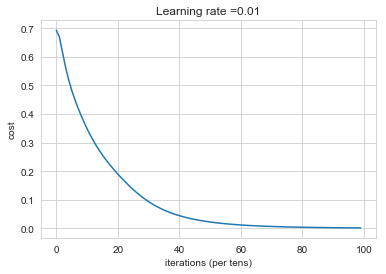

In [24]:
# plot the cost
plt.plot(np.squeeze(d['costs']))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(d['learning_rate']))
plt.show()

learning rate is: 0.1


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide


Train accuracy:  100.0
Dev accuracy:  61.702127659574465
Test accuracy:  65.77540106951872

-------------------------------------------------------

learning rate is: 0.01
Train accuracy:  100.0
Dev accuracy:  64.8936170212766
Test accuracy:  75.93582887700535

-------------------------------------------------------

learning rate is: 0.001
Train accuracy:  79.14438502673796
Dev accuracy:  76.59574468085106
Test accuracy:  75.93582887700535

-------------------------------------------------------



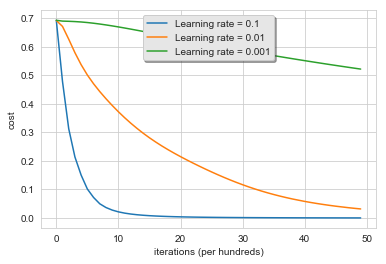

In [25]:
learning_rates = [0.1, 0.01, 0.001] # 1 and 0.1 is overshooting
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)], d[str(i)] = two_layer_model(training_x, training_y, layers_dims = (n_x, n_h, n_y), learning_rate = i, num_iterations = 5000, print_cost = False)
    print("Train accuracy: ", compute_accuracy(dnn_predict(models[str(i)],training_x), training_y))
    print("Dev accuracy: ", compute_accuracy(dnn_predict(models[str(i)],validation_x), validation_y))
    print("Test accuracy: ", compute_accuracy(dnn_predict(models[str(i)],testing_x), testing_y))
    print ('\n' + "-------------------------------------------------------" + '\n')

show_multiple_learning_rate(d, learning_rates, 'nn_multiple_alpha')

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this.

Now, you can use the trained parameters to classify images from the dataset. To see your predictions on the training and test sets, run the cell below.

Cost after iteration 0: 0.6939215338060514
Cost after iteration 1000: 0.5007447580525569
Cost after iteration 2000: 0.3734779779730683
Cost after iteration 3000: 0.28032876510687066


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide


Cost after iteration 4000: 0.21154368054880227
Train accuracy:  96.79144385026738
Dev accuracy:  79.25531914893617
Test accuracy:  83.42245989304813
Cost after iteration 0: 0.6917409420041427
Cost after iteration 1000: 0.1085374808687079
Cost after iteration 2000: 0.026856503798896397
Cost after iteration 3000: 0.009056338120902153
Cost after iteration 4000: 0.0037633437208473585


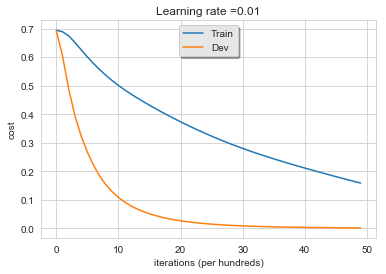

In [39]:
lrate = 0.01 
nn_parameters,d = two_layer_model(training_x, training_y, layers_dims = (n_x, n_h, n_y), learning_rate = lrate, num_iterations = 5000, print_cost=True)

print("Train accuracy: ", compute_accuracy(dnn_predict(nn_parameters,training_x), training_y)) ## I think dnn_predict should be used
print("Dev accuracy: ", compute_accuracy(dnn_predict(nn_parameters,validation_x), validation_y))
print("Test accuracy: ", compute_accuracy(dnn_predict(nn_parameters,testing_x), testing_y))

d1, d2 = two_layer_model(validation_x, validation_y, layers_dims = (n_x, n_h, n_y), learning_rate = lrate, num_iterations = 5000, print_cost=True)

    
show_train_dev_learning_rate(d['costs'], d2['costs'], lrate, 'nn_alpha')

Train accuracy:  100.0
Dev accuracy:  64.8936170212766
Test accuracy:  75.93582887700535
Confusion matrix of Testing Data:
[[55 45]
 [ 0 87]]


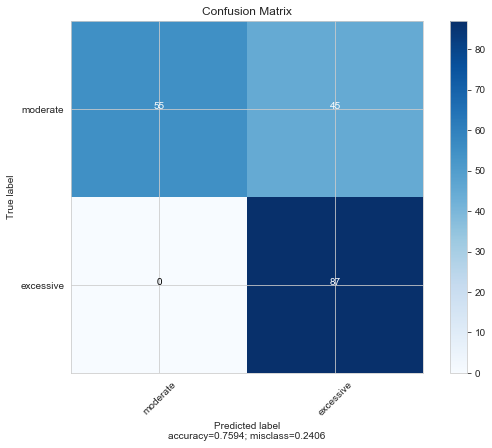

Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      0.55      0.71       100
        1.0       0.66      1.00      0.79        87

avg / total       0.84      0.76      0.75       187

Precision score: 0.8413952357802625
Recall score: 0.7593582887700535
F1 Score: 0.7491498909450093
Shallow Neural Network


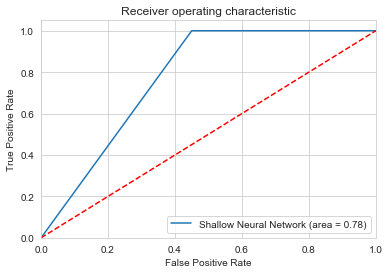

In [27]:

acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "nn_scratch", nn_parameters, None, acc_dic)

## 8 - L-layer Neural Network for classification

Use the helper functions you have implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters_deep(layer_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [28]:
### CONSTANTS ###
layers_dims = [n_features, 20, 7, 5, 1] #  5-layer model

# GRADED FUNCTION: L_layer_model
   
def L_layer_model(X, Y, layers_dims, optimizer='adam', learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed()    
    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    
    # Initialize parameters
    #parameters = initialize_parameters(layers_dims)
    parameters = initialize_parameters_he(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)

    
 # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X,parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost_dnn(AL,Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL,Y,caches)
        ### END CODE HERE ###
            
        # Update parameters
        if optimizer == "gd":
            parameters = update_parameters_with_gd(parameters, grads, learning_rate)
        elif optimizer == "momentum":
            parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
        elif optimizer == "adam":
            t = t + 1 # Adam counter
            parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)     
        if i % 100 == 0:
            costs.append(cost)
                
        # Print the cost every 100 training example
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    
    
    # Loop (gradient descent)
    """for i in range(0, num_iterations):
        minibatches = random_mini_batches(X, Y, mini_batch_size)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            AL, caches = L_model_forward(minibatch_X,parameters)


            # Compute cost
            cost = compute_cost(AL, minibatch_Y)

            # Backward propagation
            #grads = backward_propagation(minibatch_X, minibatch_Y, caches)
            grads = L_model_backward(AL,minibatch_Y,caches)
        

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        """


    d = {}
    d['learning_rate'] = learning_rate
    d['costs'] = np.squeeze(costs)
    
    return parameters, d

You will now train the model as a 5-layer neural network. 

Run the cell below to train your model. The cost should decrease on every iteration.

In [29]:
dnn_parameters, d = L_layer_model(training_x, training_y, layers_dims, learning_rate = 0.01, num_iterations = 5000, print_cost = True)
print("Train accuracy: ", compute_accuracy(dnn_predict(dnn_parameters,training_x), training_y))
print("Dev accuracy: ", compute_accuracy(dnn_predict(dnn_parameters,validation_x), validation_y))
print("Test accuracy: ", compute_accuracy(dnn_predict(dnn_parameters,testing_x), testing_y))

Cost after iteration 0: 0.693264
Cost after iteration 1000: 0.004360
Cost after iteration 2000: 0.000627
Cost after iteration 3000: 0.000210
Cost after iteration 4000: 0.000091
Train accuracy:  100.0
Dev accuracy:  57.4468085106383
Test accuracy:  58.82352941176471


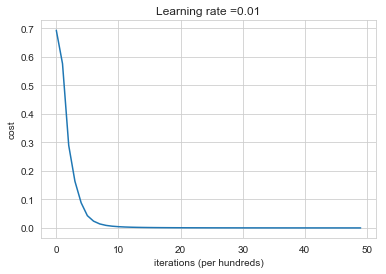

In [30]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()


learning rate is: 0.1
Train accuracy:  53.11942959001782
Dev accuracy:  44.14893617021277
Test accuracy:  46.524064171122994

-------------------------------------------------------

learning rate is: 0.01
Train accuracy:  53.11942959001782
Dev accuracy:  44.14893617021277
Test accuracy:  46.524064171122994

-------------------------------------------------------

learning rate is: 0.001
Train accuracy:  100.0
Dev accuracy:  62.765957446808514
Test accuracy:  66.31016042780749

-------------------------------------------------------



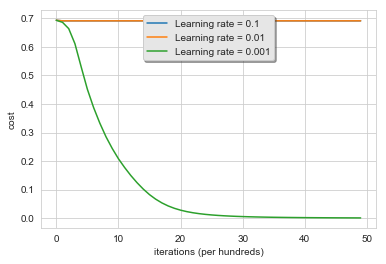

In [31]:
learning_rates = [0.1, 0.01, 0.001] 
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)], d[str(i)] = L_layer_model(training_x, training_y, layers_dims, learning_rate = i, num_iterations = 5000, print_cost = False)
    print("Train accuracy: ", compute_accuracy(dnn_predict(models[str(i)],training_x), training_y))
    print("Dev accuracy: ", compute_accuracy(dnn_predict(models[str(i)],validation_x), validation_y))
    print("Test accuracy: ", compute_accuracy(dnn_predict(models[str(i)],testing_x), testing_y))
    print ('\n' + "-------------------------------------------------------" + '\n')

show_multiple_learning_rate(d, learning_rates, 'dnn_multiple_alpha')

Cost after iteration 0: 0.693159
Cost after iteration 1000: 0.006005
Cost after iteration 2000: 0.001386
Cost after iteration 3000: 0.000575
Cost after iteration 4000: 0.000286
Train accuracy:  100.0
Dev accuracy:  61.702127659574465
Test accuracy:  63.101604278074866
Cost after iteration 0: 0.693567
Cost after iteration 1000: 0.000284
Cost after iteration 2000: 0.000056
Cost after iteration 3000: 0.000020
Cost after iteration 4000: 0.000009


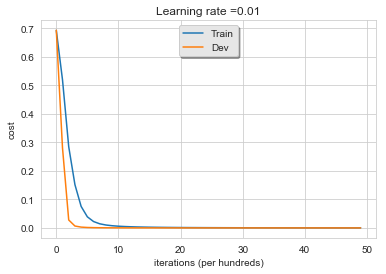

In [40]:
lrate = 0.01
dnn_parameters, d = L_layer_model(training_x, training_y, layers_dims, learning_rate = lrate, num_iterations = 5000, print_cost = True)
print("Train accuracy: ", compute_accuracy(dnn_predict(dnn_parameters,training_x), training_y))
print("Dev accuracy: ", compute_accuracy(dnn_predict(dnn_parameters,validation_x), validation_y))
print("Test accuracy: ", compute_accuracy(dnn_predict(dnn_parameters,testing_x), testing_y))

d1, d2 = L_layer_model(validation_x, validation_y, layers_dims, learning_rate = lrate, num_iterations = 5000, print_cost = True)

show_train_dev_learning_rate(d['costs'], d2['costs'], lrate, 'dnn_alpha')

Train accuracy:  100.0
Dev accuracy:  63.297872340425535
Test accuracy:  70.58823529411765
Confusion matrix of Testing Data:
[[45 55]
 [ 0 87]]


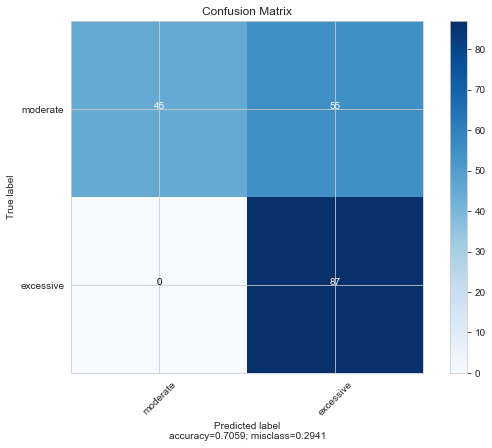

Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      0.45      0.62       100
        1.0       0.61      1.00      0.76        87

avg / total       0.82      0.71      0.69       187

Precision score: 0.8198011599005799
Recall score: 0.7058823529411765
F1 Score: 0.6854212246561024
Deep Neural Network


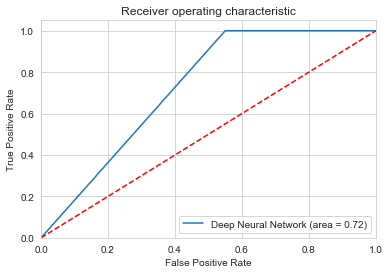

In [33]:
acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "dnn_scratch", dnn_parameters, None, acc_dic)

## 9 - Compare the performance of our implementation with $sklearn$ library code

We would like to compare our performance with the library code that is already implemented in sklearn.

In [34]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(20, 7, 5, 1), random_state=1)
print(clf.fit(training_x.T, training_y.T.ravel()))

#print("weights between input and first hidden layer:")
#print(clf.coefs_[0])
#print("\nweights between first hidden and second hidden layer:")
#print(clf.coefs_[1])

print("Training set score: %f" % clf.score(training_x.T, training_y.T))
print("Test set score: %f" % clf.score(training_x.T, training_y.T))

result = clf.predict(testing_x.T)
print(result)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 7, 5, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
Training set score: 0.992870
Test set score: 0.992870
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 

hi
Train accuracy:  99.28698752228163
Dev accuracy:  78.19148936170212
Test accuracy:  83.42245989304813
Confusion matrix of Testing Data:
[[69 31]
 [ 0 87]]


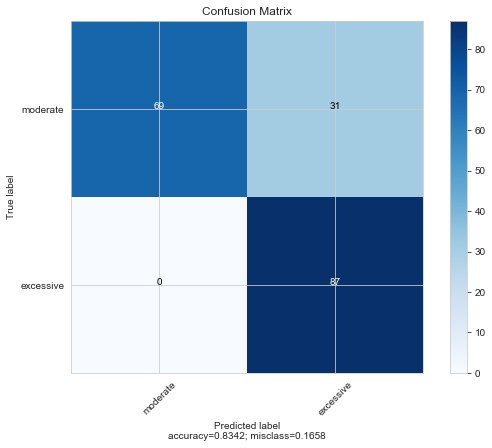

Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      0.69      0.82       100
        1.0       0.74      1.00      0.85        87

avg / total       0.88      0.83      0.83       187

Precision score: 0.8777757636182362
Recall score: 0.8342245989304813
F1 Score: 0.831554583811509
dnn_sklearn


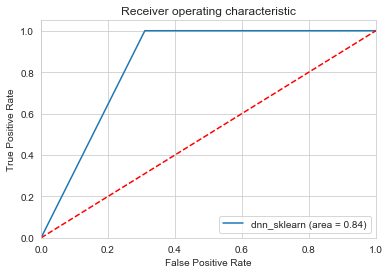

In [35]:
acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "dnn_sklearn", None, clf, acc_dic)

{'lr_scratch': [[53.11942959001782, 44.14893617021277, 46.524064171122994, 0.21644885469987704, 0.46524064171123, 0.2954447870720949]], 'lr_sklearn': [[96.07843137254902, 86.70212765957447, 91.44385026737967, 0.9277296090545663, 0.9144385026737968, 0.9143210269337609]], 'l1_scratch': [[53.11942959001782, 44.14893617021277, 46.524064171122994, 0.21644885469987704, 0.46524064171123, 0.2954447870720949]], 'nn_sklearn': [[83.77896613190731, 72.34042553191489, 80.21390374331551, 0.8611781956184235, 0.8021390374331551, 0.7970304242049007]], 'nn_scratch': [[100.0, 64.8936170212766, 75.93582887700535, 0.8413952357802625, 0.7593582887700535, 0.7491498909450093]], 'dnn_scratch': [[100.0, 63.297872340425535, 70.58823529411765, 0.8198011599005799, 0.7058823529411765, 0.6854212246561024]], 'dnn_sklearn': [[99.28698752228163, 78.19148936170212, 83.42245989304813, 0.8777757636182362, 0.8342245989304813, 0.831554583811509]]}
(7, 6)
[[ 53.11942959  44.14893617  46.52406417   0.21644885   0.46524064
   

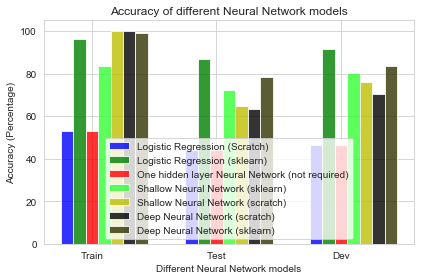

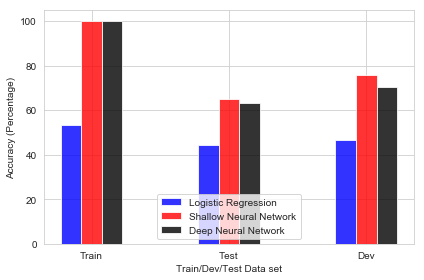

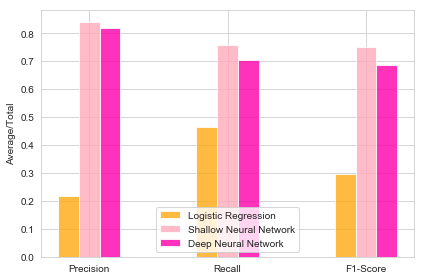

In [36]:
print(acc_dic)
show_barchart(acc_dic)

### 9 -Implementation of Deep Neural Network in Tensorflow

TODO

### 10 - Conclusion

TODO